In [1]:
import sys
sys.path.append('/mnt/home/mbedell/.local/lib/python3.7/site-packages')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table, join

In [28]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["figure.figsize"] = 6, 4
rcParams["font.size"] = 16
rcParams["text.usetex"] = False
rcParams["font.family"] = ["sans-serif"]
rcParams["axes.unicode_minus"] = False

In [3]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [4]:
d = fits.open('data/GAIA-ST.fits')
gaia_data = Table(d[1].data)
gaia_data['HIP'] = np.array([h.strip() for h in gaia_data['HIP']])

In [5]:
d = np.genfromtxt('data/harps-summary.csv', delimiter=',', dtype=None, unpack=True, names=True, 
                 usecols=(0,1,2,3,4,5,7,8,10,11,12,13), encoding=None)
harps_data = Table(d)
harps_data['star'].name = 'HIP'

In [9]:
data = join(harps_data, gaia_data, keys=('HIP'))

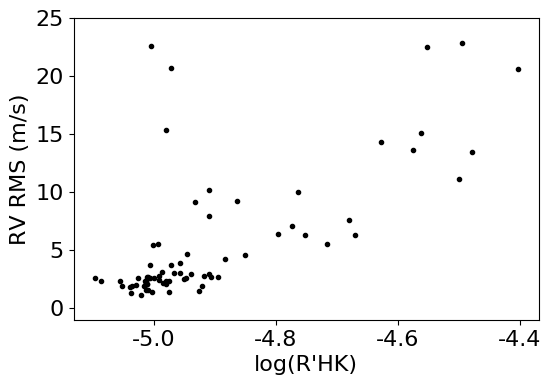

In [31]:
plt.plot(data['logrhk'], data['RMS'], 'k.')
plt.ylim([-1,25])
plt.xlabel('log(R\'HK)')
plt.ylabel('RV RMS (m/s)');

In [45]:
np.sum(data['phot_variable_flag'] != 'NOT_AVAILABLE')

0

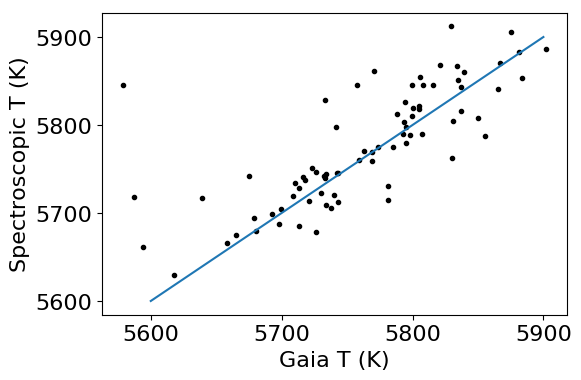

In [51]:
plt.plot(data['teff_val'], data['teff'], 'k.')
plt.plot(np.linspace(5600,5900,100), np.linspace(5600,5900,100))
plt.xlabel('Gaia T (K)')
plt.ylabel('Spectroscopic T (K)');

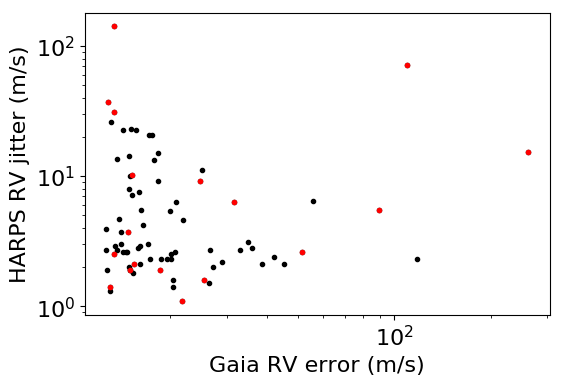

In [78]:
binary_mask = data['trend'] != ' '
#binary_mask = data['binarity'] > 0
plt.loglog(data['radial_velocity_error']*100., data['RMS'], 'k.')
plt.loglog(data['radial_velocity_error'][binary_mask]*100., data['RMS'][binary_mask], 'r.')
plt.xlabel('Gaia RV error (m/s)')
plt.ylabel('HARPS RV jitter (m/s)');

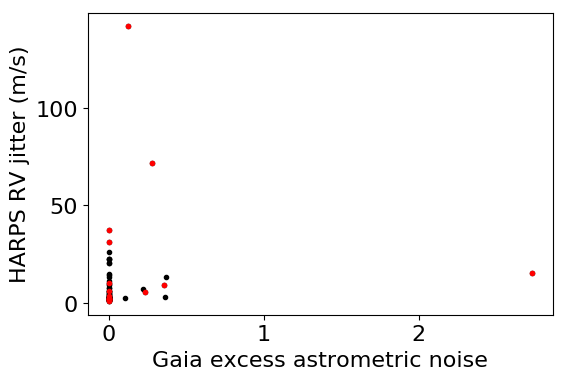

In [102]:
plt.plot(data['astrometric_excess_noise'], data['RMS'], 'k.')
plt.plot(data['astrometric_excess_noise'][binary_mask], data['RMS'][binary_mask], 'r.')
plt.xlabel('Gaia excess astrometric noise')
plt.ylabel('HARPS RV jitter (m/s)');

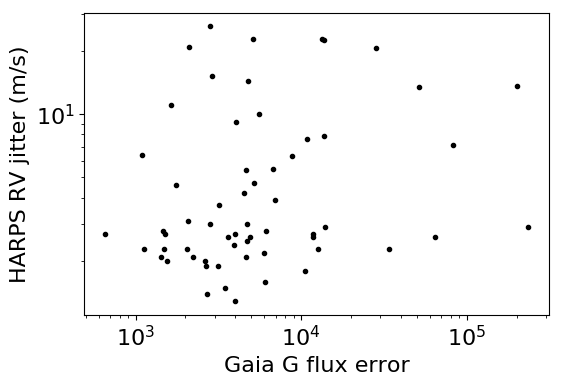

In [108]:
plt.loglog(data['phot_g_mean_flux_error'][~binary_mask], data['RMS'][~binary_mask], 'k.')
plt.xlabel('Gaia G flux error')
plt.ylabel('HARPS RV jitter (m/s)');

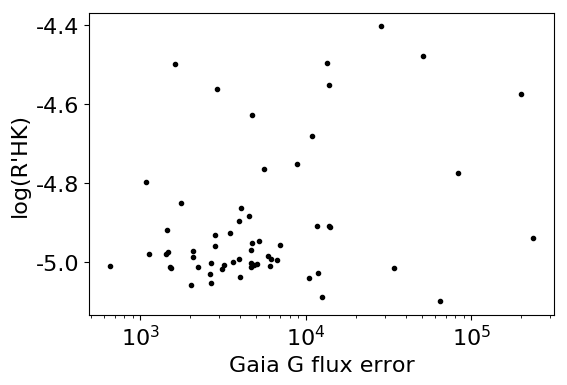

In [110]:
plt.plot(data['phot_g_mean_flux_error'][~binary_mask], data['logrhk'][~binary_mask], 'k.')
plt.xlabel('Gaia G flux error')
plt.ylabel('log(R\'HK)')
plt.xscale('log');

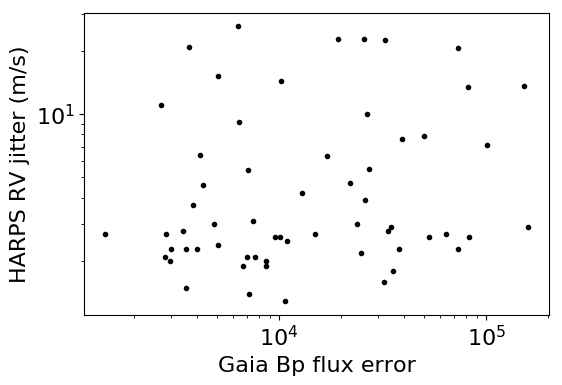

In [90]:
plt.loglog(data['phot_bp_mean_flux_error'][~binary_mask], data['RMS'][~binary_mask], 'k.')
plt.xlabel('Gaia Bp flux error')
plt.ylabel('HARPS RV jitter (m/s)');

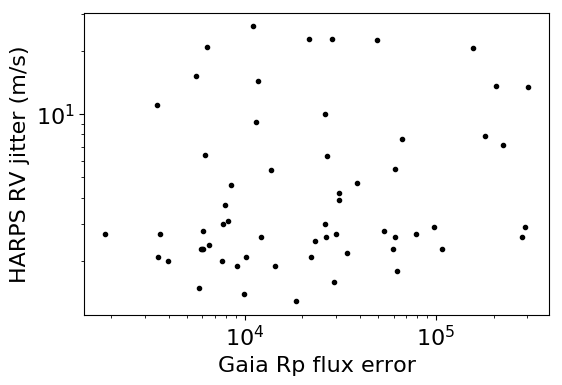

In [106]:
plt.loglog(data['phot_rp_mean_flux_error'][~binary_mask], data['RMS'][~binary_mask], 'k.')
plt.xlabel('Gaia Rp flux error')
plt.ylabel('HARPS RV jitter (m/s)');